# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('previsao_de_renda.csv')
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(int)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(int)
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,0,1,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,1,1,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,1,1,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,1,0,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,0,0,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
df['data_ref'].unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

In [5]:
posse_imovel_stats = df.groupby('posse_de_imovel')['renda'].describe()
posse_imovel_stats['std_error'] = posse_imovel_stats['std'] / np.sqrt(posse_imovel_stats['count'])

In [6]:
posse_veiculo_stats = df.groupby('posse_de_veiculo')['renda'].describe()
posse_veiculo_stats['std_error'] = posse_veiculo_stats['std'] / np.sqrt(posse_veiculo_stats['count'])

In [7]:
posse_imovel_stats.reset_index(inplace=True)
posse_veiculo_stats.reset_index(inplace=True)

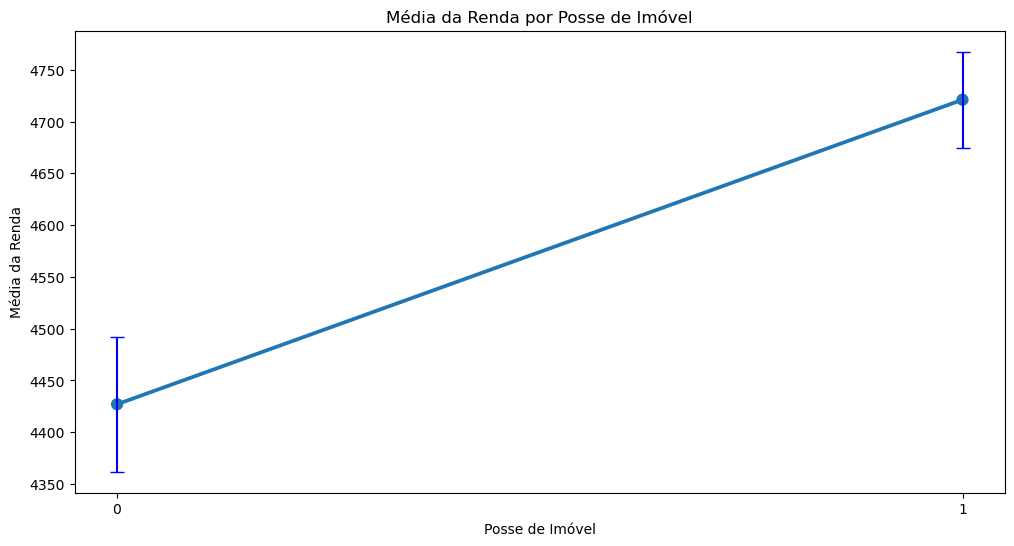

In [8]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='posse_de_imovel', y='mean', data=posse_imovel_stats, ci=None, capsize=0.1)
plt.errorbar(x=posse_imovel_stats['posse_de_imovel'], y=posse_imovel_stats['mean'], yerr=posse_imovel_stats['std_error'], fmt='none', capsize=5, color='blue')
plt.title('Média da Renda por Posse de Imóvel')
plt.xlabel('Posse de Imóvel')
plt.ylabel('Média da Renda')
plt.show()

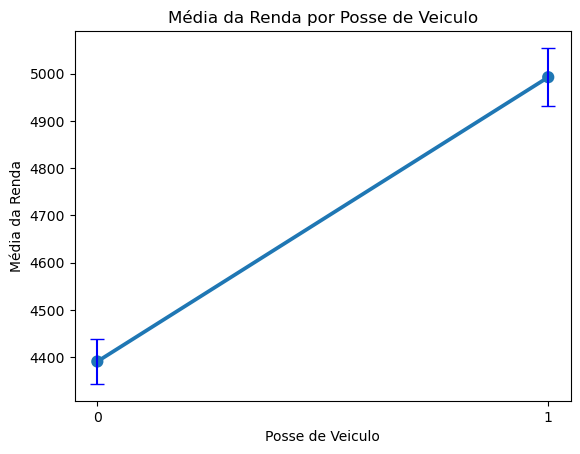

In [9]:
sns.pointplot(x='posse_de_veiculo', y='mean', data=posse_veiculo_stats, ci=None, capsize=0.1)
plt.errorbar(x=posse_veiculo_stats['posse_de_veiculo'], y=posse_veiculo_stats['mean'], yerr=posse_veiculo_stats['std_error'], fmt='none', capsize=5, color='blue')
plt.title('Média da Renda por Posse de Veiculo')
plt.xlabel('Posse de Veiculo')
plt.ylabel('Média da Renda')
plt.show()

In [10]:
print(' Com base nos 2 gráficos, percebo que a renda média de quem tem veículo é maior do que quem tem imóvel, portanto, ele aparenta ter um fator maior no score.')

 Com base nos 2 gráficos, percebo que a renda média de quem tem veículo é maior do que quem tem imóvel, portanto, ele aparenta ter um fator maior no score.


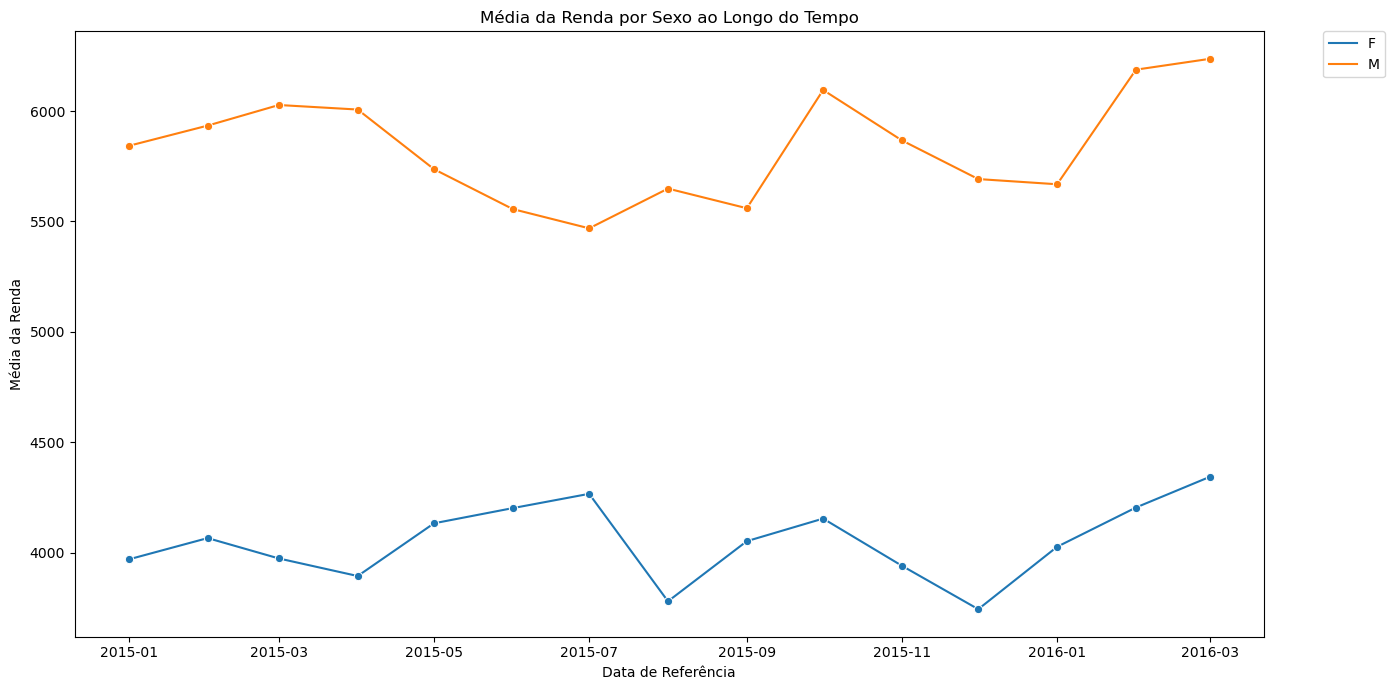

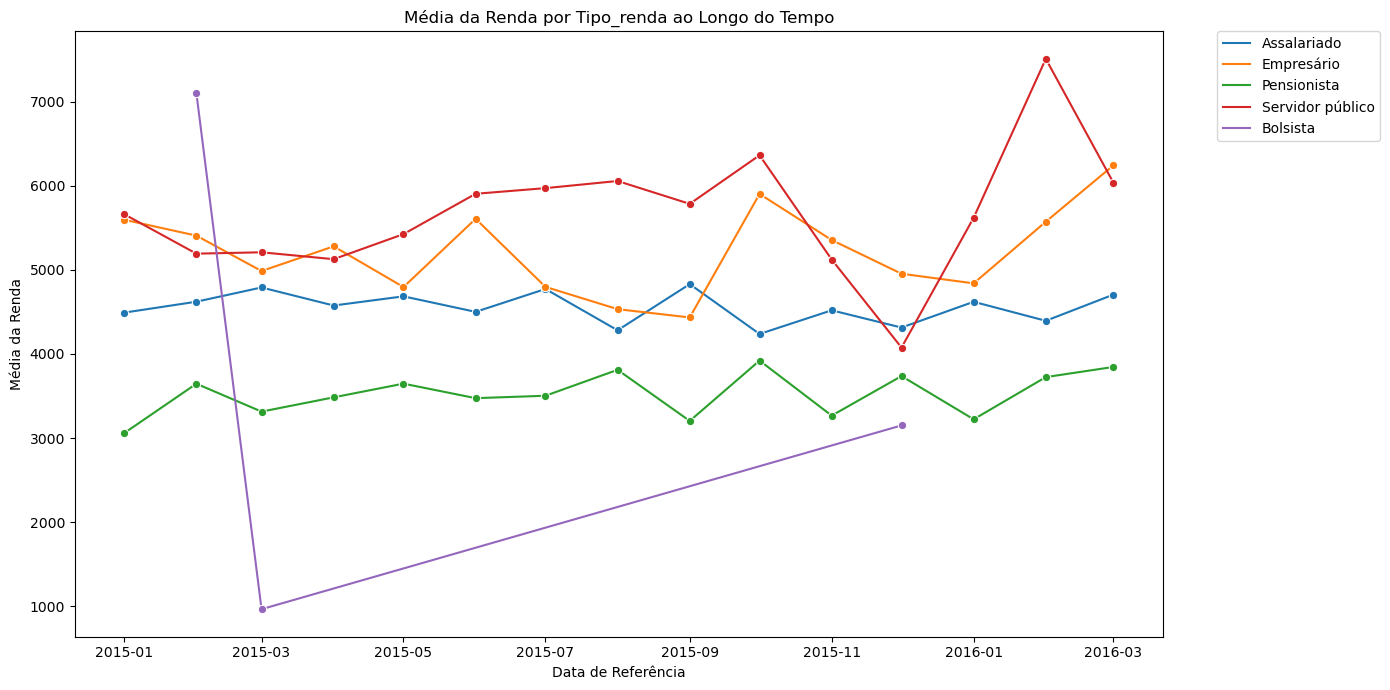

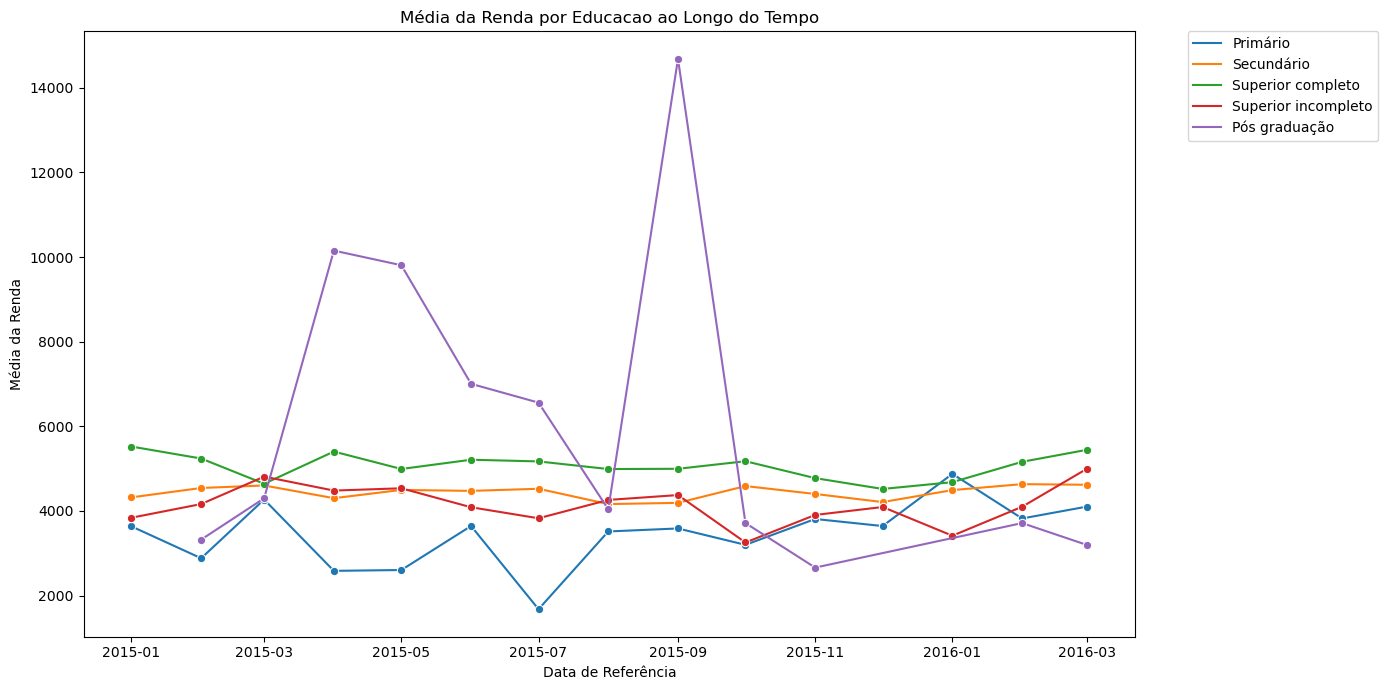

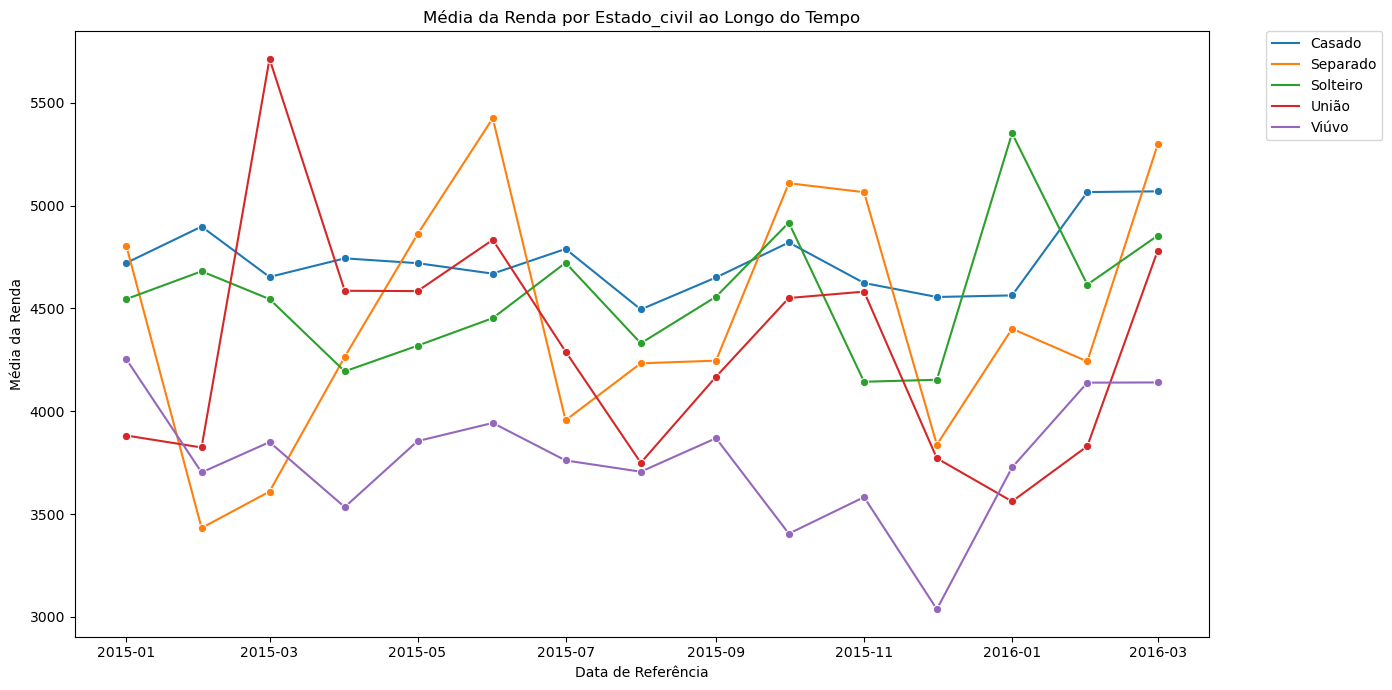

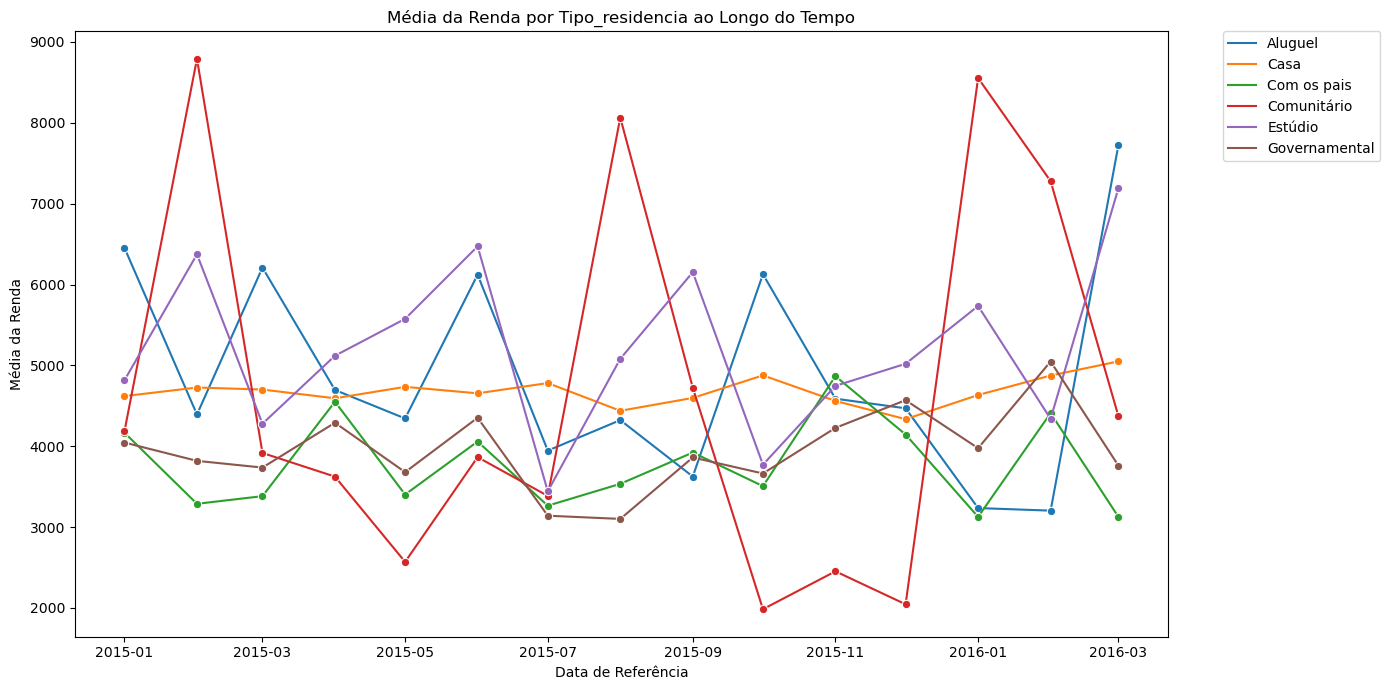

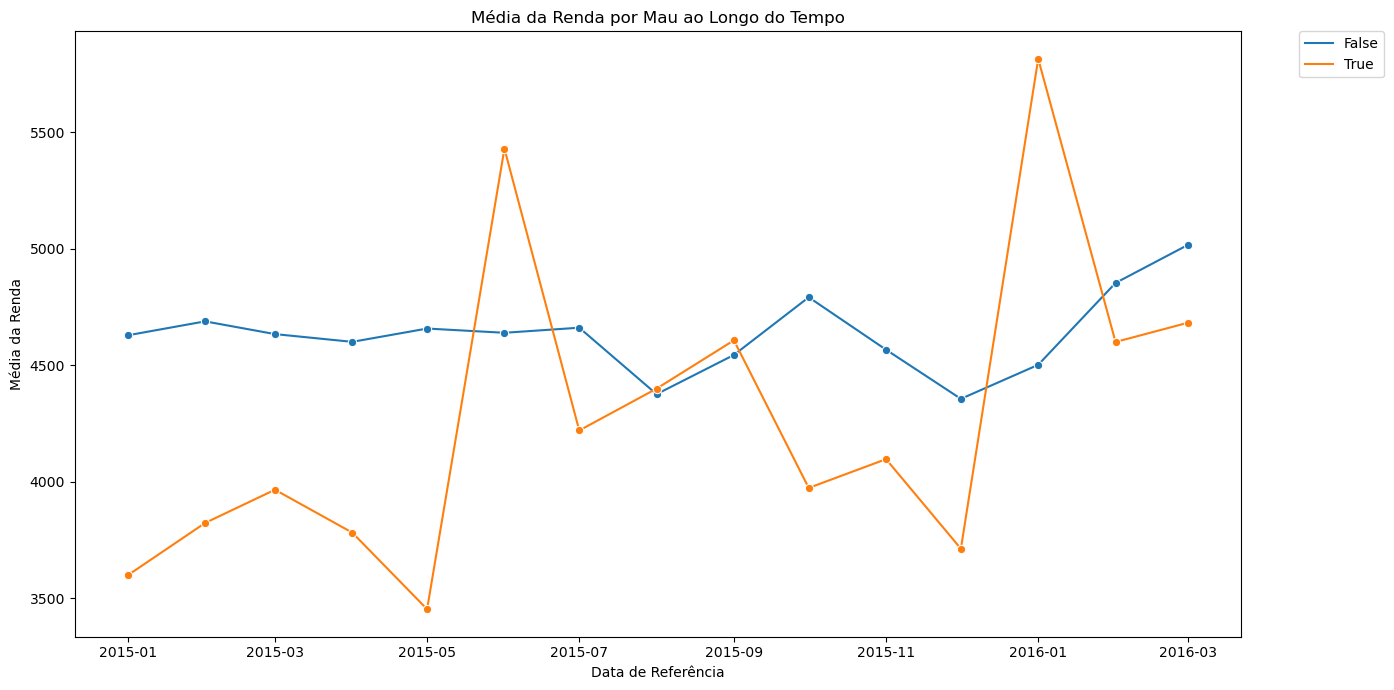

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o DataFrame
df = pd.read_csv('previsao_de_renda.csv')

# Remover a coluna 'Unnamed: 0' se existir
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Renomear a coluna de datas para 'data_ref_atualizadas' se necessário
if 'data_ref' in df.columns:
    df.rename(columns={'data_ref': 'data_ref_atualizadas'}, inplace=True)

# Converter a coluna 'data_ref_atualizadas' para datetime
df['data_ref_atualizadas'] = pd.to_datetime(df['data_ref_atualizadas'])

# Variáveis qualitativas
variaveis_qualitativas = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']

# Função para calcular a média da renda e plotar o gráfico
def plotar_media_por_variavel(df, variavel):
    media_df = df.groupby(['data_ref_atualizadas', variavel])['renda'].mean().reset_index()
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='data_ref_atualizadas', y='renda', hue=variavel, data=media_df, marker='o')
    plt.title(f'Média da Renda por {variavel.capitalize()} ao Longo do Tempo')
    plt.xlabel('Data de Referência')
    plt.ylabel('Média da Renda')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

# Plotar gráficos para cada variável qualitativa
for var in variaveis_qualitativas:
    plotar_media_por_variavel(df, var)